In [384]:
from importlib import reload
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nsfg; reload(nsfg)
import utils; reload(utils)

<module 'utils' from '/home/taot/github/playground/thinkstats/utils.py'>

In [158]:
preg = nsfg.ReadFemPreg(prefix='data/')
live = preg[preg.outcome == 1]
firsts = live[live.pregordr == 1]
others = live[live.pregordr != 1]

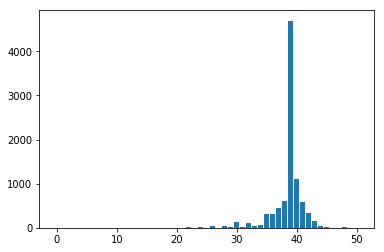

In [107]:
prglngth_hist = utils.Hist(preg_live.prglngth)
prglngth_hist.show()

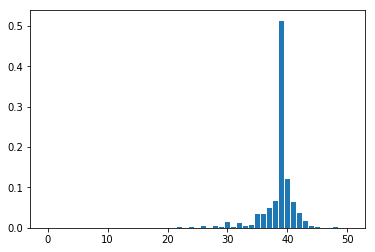

In [108]:
prglngth_pmf = utils.Pmf(prglngth_hist)
prglngth_pmf.show()

## Difference between firsts and others

In [51]:
firsts_hist = utils.Hist(firsts.prglngth)
firsts_pmf = utils.Pmf(firsts_hist)
others_hist = utils.Hist(others.prglngth)
others_pmf = utils.Pmf(others_hist)

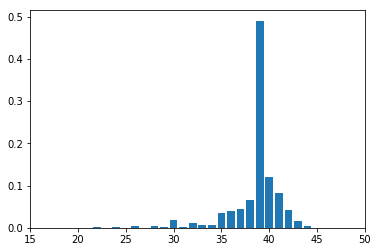

In [52]:
firsts_pmf.show()

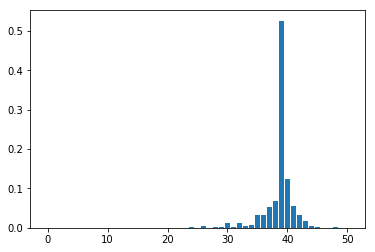

In [53]:
others_pmf.show()

## Class size paradox

h.mean() = 23.692307692307693


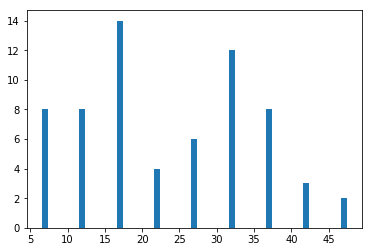

In [130]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
h = utils.Hist(d)
print('h.mean() = ' + str(h.mean()))
h.show()

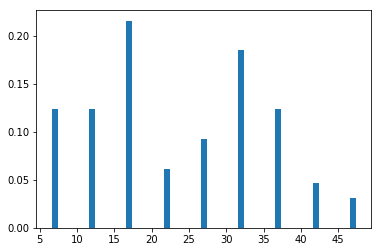

In [131]:
pmf = utils.Pmf(h)
pmf.show()

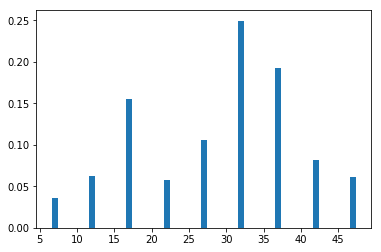

In [132]:
biased = pmf.copy()
for x, p in biased.items():
    biased.mult(x, x);
biased.normalize()
biased.show()

## DataFrame indexing

In [137]:
array = np.random.randn(4, 2)
columns = ['A', 'B']
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,0.587839,0.076771
1,0.481878,1.316425
2,1.786075,-0.044632
3,-0.436642,-0.184710


In [152]:
df[['A', 'B']].loc[0:5]

,A,B
0,0.587839,0.076771
1,0.481878,1.316425
2,1.786075,-0.044632
3,-0.436642,-0.184710


In [226]:
type(df.loc[[0,1,2]].A)

pandas.core.series.Series

## Exercise

In [ ]:
preg[['caseid', 'pregordr', 'prglngth', 'outcome']]

In [165]:
live.loc[1].pregordr

2.0

In [218]:
def makePregMap():
    preg_map = {}
    for idx, row in live.iterrows():
        caseid = int(row.caseid)
        lst = preg_map.get(caseid, list())
        preg_map[caseid] = lst
        lst.append(idx)
    return preg_map

In [219]:
preg_map = makePregMap()

In [232]:
def pairDiffs(preg_map):
    diffs_all = []
    for caseid, indices in preg_map.items():
        lengths = live.loc[indices].prglngth.values
        if len(lengths) < 2:
            continue
        first = lengths[0]
        rest = lengths[1:]
        diffs = [first - x for x in rest]
        diffs_all.extend(diffs)
    return diffs_all

In [ ]:
diffs = pairDiffs(preg_map)

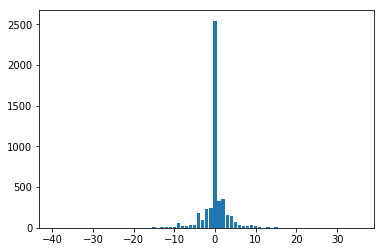

In [235]:
h = utils.Hist(diffs)
h.show()

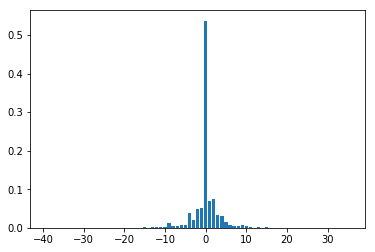

In [236]:
pmf = utils.Pmf(diffs)
pmf.show()

### Relay bias

In [237]:
import relay

In [238]:
relay_data = relay.ReadResults('data/Apr25_27thAn_set1.shtml')

In [239]:
relay_data

[('1', '1/362', 'M2039', '30:43', '30:42', '4:57'),
 ('2', '2/362', 'M2039', '31:36', '31:36', '5:06'),
 ('3', '3/362', 'M2039', '31:42', '31:42', '5:07'),
 ('4', '4/362', 'M2039', '32:28', '32:27', '5:14'),
 ('5', '5/362', 'M2039', '32:52', '32:52', '5:18'),
 ('6', '6/362', 'M2039', '33:06', '33:06', '5:20'),
 ('7', '1/256', 'M4049', '33:33', '33:33', '5:24'),
 ('8', '2/256', 'M4049', '33:42', '33:42', '5:26'),
 ('9', '3/256', 'M4049', '33:54', '33:54', '5:28'),
 ('10', '7/362', 'M2039', '33:56', '33:56', '5:28'),
 ('11', '8/362', 'M2039', '34:13', '34:13', '5:31'),
 ('12', '4/256', 'M4049', '34:25', '34:25*', '5:33'),
 ('13', '5/256', 'M4049', '35:22', '35:22', '5:42'),
 ('14', '9/362', 'M2039', '35:50', '35:49', '5:46'),
 ('15', '1/448', 'F2039', '36:31', '36:31', '5:53'),
 ('16', '10/362', 'M2039', '36:42', '36:41', '5:55'),
 ('17', '2/448', 'F2039', '36:53', '36:52', '5:56'),
 ('18', '3/448', 'F2039', '37:16', '37:16', '6:00'),
 ('19', '11/362', 'M2039', '37:35', '37:26', '6:02'),

In [294]:
def get_time_in_minutes(sTime):
    sTime = sTime.strip('*')
    parts = sTime.split(':')
    if len(parts) < 2:
        parts.insert(0, 0)
    if len(parts) < 3:
        parts.insert(0, 0)
    h = int(parts[0])
    m = int(parts[1])
    s = int(parts[2])
    return h * 60 + m + s / 60.0

In [295]:
def get_speed(sNetTime):
    d = 10
    t = get_time_in_minutes(sNetTime)
    return d / t * 60 / 1.6

In [385]:
speeds = [get_speed(r[4]) for r in relay_data]

In [386]:
speeds

[12.21498371335505,
 11.867088607594935,
 11.829652996845425,
 11.55624036979969,
 11.409736308316429,
 11.32930513595166,
 11.177347242921014,
 11.127596439169137,
 11.061946902654865,
 11.05108055009823,
 10.959571358986848,
 10.895883777239709,
 10.60320452403393,
 10.469986040018613,
 10.26928343222273,
 10.222626079054974,
 10.171790235081373,
 10.062611806797852,
 10.01780943900267,
 9.955752212389381,
 9.93816254416961,
 9.84251968503937,
 9.82532751091703,
 9.821038847664775,
 9.816753926701569,
 9.778357235984355,
 9.740259740259738,
 9.736045002163566,
 9.731833910034602,
 9.723422644770958,
 9.719222462203023,
 9.698275862068964,
 9.615384615384613,
 9.578544061302683,
 9.574468085106384,
 9.566326530612244,
 9.558198810535258,
 9.525825571549532,
 9.48566610455312,
 9.48566610455312,
 9.477674810446501,
 9.437919463087248,
 9.433962264150942,
 9.430008382229673,
 9.430008382229673,
 9.42211055276382,
 9.41816659690247,
 9.347735770668882,
 9.332227291580258,
 9.328358208955

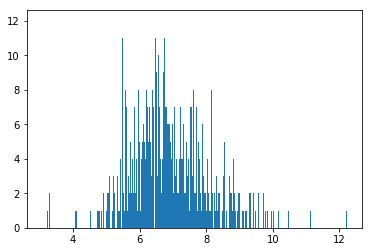

In [391]:
h = utils.Hist(speeds)
h.show(width=0.005)

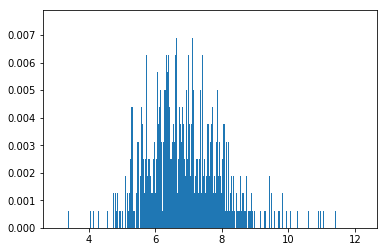

In [393]:
pmf = utils.Pmf(speeds)
pmf.show(width=0.005)

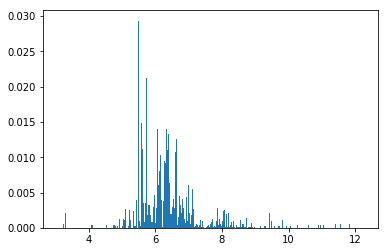

In [398]:
pmf2 = pmf.copy()
for sp, p in pmf2.items():
    pmf2.mult(sp, p * abs(sp - 7.5))
pmf2.normalize()
pmf2.show(width=0.01)